<a href="https://colab.research.google.com/github/kd0176/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name    - Online Retail Customer Segmentation**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Individual Name -** Kuldeep Singh

# **Project Summary -**

This is a AlmaBetter's capstone project and the topic is Online Retail Customer Segmentation, which is a unsupervised machine learning task.

Unsupervised machine learning (ML) is a type of ML that involves learning patterns and relationships in data without the use of explicit labels or supervision. In other words, the goal of unsupervised learning is to identify structure and patterns within data sets without any prior knowledge of what those patterns might be.

The goal of this project is to identify major customer segments.

Customer segmentation is the process of dividing a customer base into distinct groups based on their characteristics, behavior, or demographics. This allows businesses to create targeted marketing campaigns, personalize their messaging, and improve the customer experience.

There are several ways to segment customers, including:

1. Demographic segmentation: Dividing customers based on their age, gender, income, education, occupation, and other demographic factors.

2. Geographic segmentation: Dividing customers based on their location, such as country, region, city, or postal code.

3. Psychographic segmentation: Dividing customers based on their personality, values, beliefs, and lifestyle.

4. Behavioral segmentation: Dividing customers based on their behavior, such as purchase history, frequency of purchases, brand loyalty, and product usage.

By segmenting customers, businesses can better understand the needs and preferences of different groups, and tailor their marketing strategies to meet those needs. For example, a business may create different marketing campaigns for different age groups or geographic regions, or offer personalized product recommendations based on a customer's purchase history.

Customer segmentation can be performed manually by analyzing customer data, or using machine learning algorithms to automatically segment customers based on patterns in their data. Regardless of the approach used, customer segmentation is a valuable tool for businesses to improve their marketing efforts and provide better customer experiences.

# **GitHub Link -**

https://github.com/kd0176/Online-Retail-Customer-Segmentation

# **Problem Statement**


In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Dataset Description :

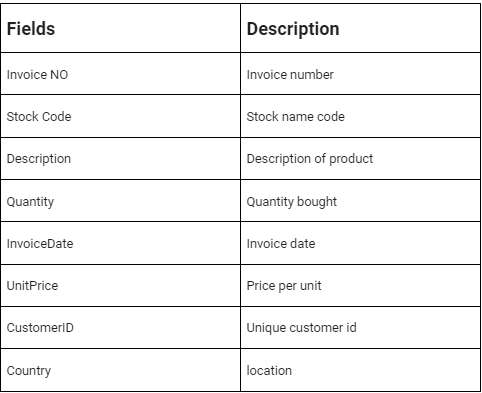

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np                              # for numerical computations
import pandas as pd                             # for data manipulation and analysis

import seaborn as sns                           # for data visualization
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')               # ignore warnings

from wordcloud import WordCloud, STOPWORDS      # to generate word cloud


### Dataset Loading

In [2]:
# Load Dataset
url='https://docs.google.com/spreadsheets/d/15QeOK8Cp1gn98UGoAtjYKOjpYn5tS8Q2/edit?usp=share_link&ouid=112152660510254781901&rtpof=true&sd=true'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_excel(url)

### Dataset First View

In [3]:
# Dataset First Look
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [4]:
df.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(541909, 8)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
# Missing Values/Null Values percentage
df.isnull().sum()/df.shape[0]*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

Text(0.5, 1.0, 'Visualizing the missing values')

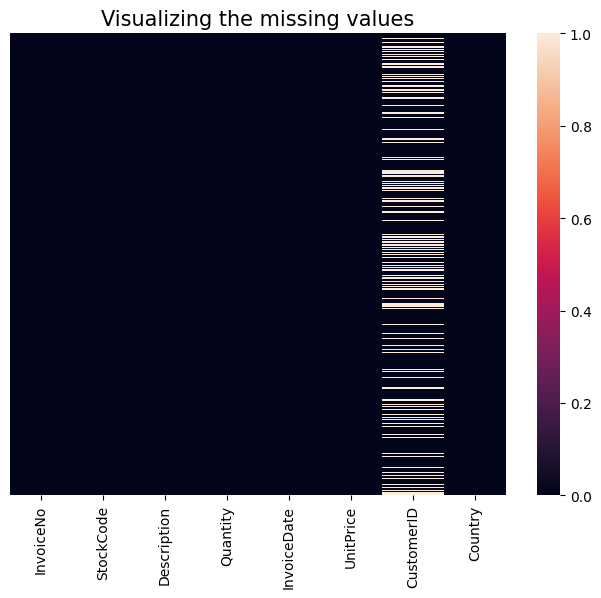

In [10]:
# Visualizing the missing values
plt.figure(figsize = (8,6))
sns.heatmap(df.isnull(), cbar=True, annot=False, yticklabels=False)
plt.title('Visualizing the missing values', fontsize = 15)

### What did you know about your dataset?

* Given dataset has 541909 rows and 8 columns.
* It has 5268 duplicated rows.
* CustomerID column contains approx 25% of missing values.
* Description column also contains some null values about of 0.26%.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe(include = 'all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


In [13]:
# transactions with negative 'Quantity'
(df[df['Quantity'] < 0])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


### Variables Description 

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

### Check Unique Values for each variable.

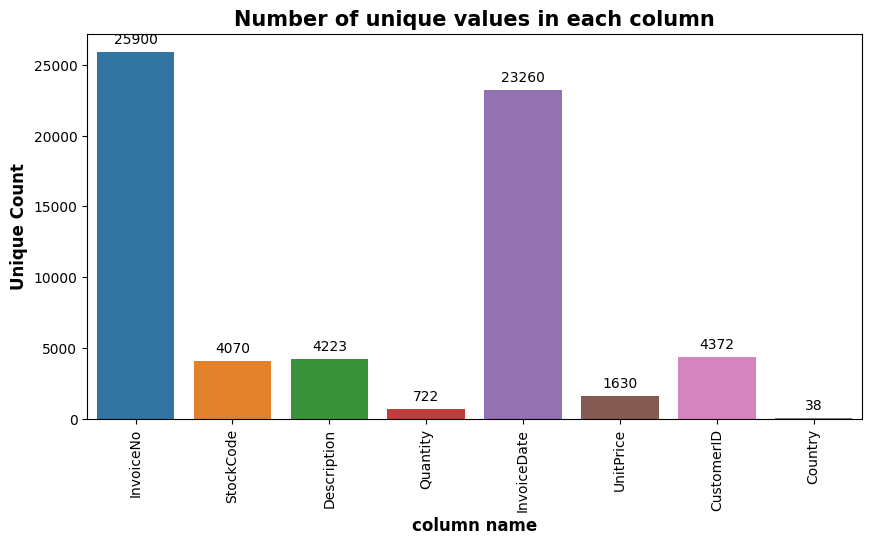

In [14]:
# Check Unique Values for each variable.
unique_df=pd.DataFrame()
unique_df['column name']=df.columns
unique_count=[]
for i in df.columns:
  unique_count.append(df[i].nunique())
unique_df['unique_count']=unique_count



plt.figure(figsize = (10,5))

splot = sns.barplot(x=unique_df['column name'], y=unique_df['unique_count'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Number of unique values in each column',weight='bold', size=15)
plt.ylabel('Unique Count', size=12, weight='bold')
plt.xlabel('column name', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

In [15]:
# get unique values for 'Country'
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

## 3. ***Data Wrangling***

### Write your code to make your dataset analysis ready.


### Remove the duplicated rows as these are not neccessary for our analysis.

In [16]:
# droping duplicates
df.drop_duplicates(inplace = True)

In [17]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


### Handling Missing Values

Drop missing values present in 'CustomerID' as we cannot replace it with mode value beacuse it will affect while aggregation.

In [18]:
# droping missing values 'CustomerID' 
df.dropna(subset = ['CustomerID'], inplace=True)

dropping NA in 'CustomerID' column also removed NA in 'Description' column.

In [19]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [20]:
# shape of dataset after removing duplicates and null values
df.shape

(401604, 8)

### InvoiceNo which are starts with 'c' indicates cancellation, create a new dataframe for cancelled transactions for later analysis.

In [21]:
#  converting data type to 'str'
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

# creating separate dataframe for cancelled transactions 
cancel_df = df.loc[df['InvoiceNo'].str.contains('C')]


In [22]:
# cancellation percentage
transaction_count = df.loc[~df['InvoiceNo'].str.contains('C')].shape[0]
cancel_percent = round((cancel_df.shape[0] / transaction_count * 100), 2)
print(f'Approx {cancel_percent}% transactions was cancelled.')

Approx 2.26% transactions was cancelled.


### Approx 2.26% transactions was cancelled.

## check for outliers

In [23]:
# data summary
df[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,401604.000000,401604.000000
mean,12.183273,3.474064
std,250.283037,69.764035
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


### ploting distribution chart for 'Quantity' and 'UnitPrice'

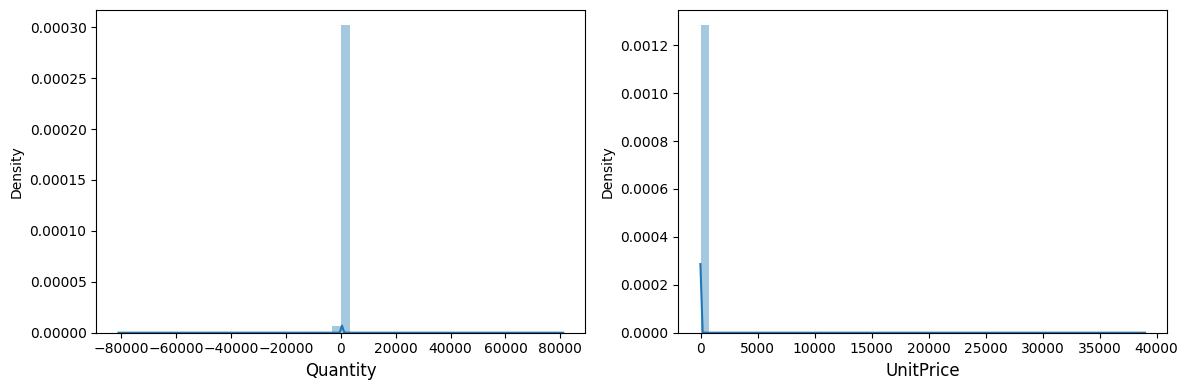

In [24]:
# distribution plot for 'Quantity'
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.xlabel('Quantity', fontsize = 12)
sns.distplot(df['Quantity'])

# distribution plot for 'UnitPrice'
plt.subplot(1, 2, 2)
plt.xlabel('UnitPrice', fontsize = 12)
sns.distplot(df['UnitPrice'])
plt.tight_layout()

* Quantity column has highly skewed distributions at both side.
* UnitPrice column has highly right skewed distribution.

### ploting box plot to check outliers

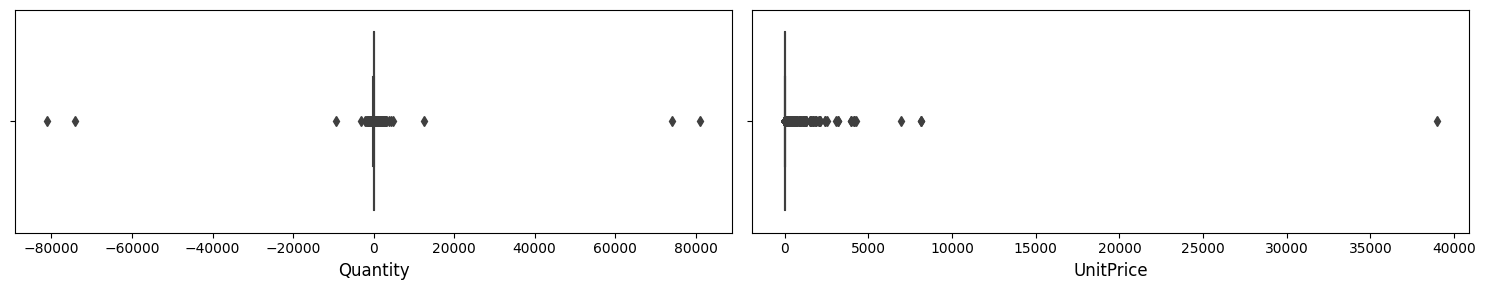

In [25]:
# box plots for 'Quantity'
fig = plt.figure(figsize=(15,3))
plt.subplot(1, 2, 1)
plt.xlabel('Quantity', fontsize = 12)
sns.boxplot(x='Quantity',data=df)

# box plot for 'UnitPrice'
plt.subplot(1, 2, 2)
plt.xlabel('UnitPrice', fontsize = 12)
sns.boxplot(x='UnitPrice',data=df)
plt.tight_layout()

### checking transactions with 'Quantity' more than 5000 and less than -5000.

In [26]:
df[df['Quantity'] > 5000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom


In [27]:
df[df['Quantity'] < -5000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


* Transactions with extreme 'Quantity' more than 5000 was already cancelled, maybe these orders was placed by mistake.
* for rest of the extreme quantity values which are less than 5000, cannot consider them as outliers because most of the customers are wholeseller, so it is possible they buy in thousands of quantity.  

### checking transactions with 'UnitPrice' more than 1000 dollar.

In [28]:
df[(df['UnitPrice'] > 1000) & (~df['InvoiceNo'].str.contains('C'))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
117054,546328,M,Manual,1,2011-03-11 10:19:00,1687.17,14911.0,EIRE
117055,546329,M,Manual,1,2011-03-11 10:22:00,1687.17,14911.0,EIRE
144826,548813,M,Manual,1,2011-04-04 13:03:00,2382.92,12744.0,Singapore
144828,548813,M,Manual,1,2011-04-04 13:03:00,1252.95,12744.0,Singapore
144829,548820,M,Manual,1,2011-04-04 13:04:00,2053.07,12744.0,Singapore
145831,548913,M,Manual,1,2011-04-05 09:45:00,1136.30,12669.0,France
150615,549468,M,Manual,1,2011-04-08 14:27:00,1867.86,17940.0,United Kingdom
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom
200745,554155,M,Manual,1,2011-05-23 11:26:00,1241.98,12757.0,Portugal
201553,554301,M,Manual,1,2011-05-23 14:46:00,1241.98,12757.0,Portugal


In [29]:
df[(df['UnitPrice'] > 1000) & (df['InvoiceNo'].str.contains('C'))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45622,C540271,M,Manual,-1,2011-01-06 11:51:00,1126.00,12503.0,Spain
73446,C542348,M,Manual,-1,2011-01-27 12:09:00,1715.85,12539.0,Spain
117052,C546325,M,Manual,-1,2011-03-11 10:15:00,1687.17,14911.0,EIRE
117053,C546327,M,Manual,-1,2011-03-11 10:18:00,1687.17,14911.0,EIRE
144831,C548830,M,Manual,-1,2011-04-04 13:08:00,2382.92,12744.0,Singapore
144833,C548830,M,Manual,-1,2011-04-04 13:08:00,1252.95,12744.0,Singapore
144834,C548834,M,Manual,-1,2011-04-04 13:09:00,2053.07,12744.0,Singapore
145832,C548914,M,Manual,-1,2011-04-05 09:46:00,1136.30,12669.0,France
150591,C549452,D,Discount,-1,2011-04-08 14:17:00,1867.86,17940.0,United Kingdom
173277,C551685,POST,POSTAGE,-1,2011-05-03 12:51:00,8142.75,16029.0,United Kingdom


### Most of the transactions with 'UnitPrice' more than 1000 was already cancelled and most of their description says manual which could mean these are specially manufactured on customer's demand so it is possible that their price can be more than usual price. 

### creating new variable 'TotalPrice' by multiplying 'Quantity' and 'UnitPrice'

In [30]:
# creating new variable 'TotalPrice'
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

### Creating new columns by extracting different datetime components from 'InvoiceDate' for time series analysis. 

In [132]:
# extracting only date from InvoiceDate.
df['date'] = df['InvoiceDate'].dt.date

# extracting 'year' from 'InvoiceDate'
df['year'] = df['InvoiceDate'].dt.year

# extracting 'month' from 'InvoiceDate'
df['month'] = df['InvoiceDate'].dt.strftime('%b')

# extracting 'day' from 'InvoiceDate'
df['day'] = df['InvoiceDate'].dt.day

# extracting 'weekday' from 'InvoiceDate'
df['weekday'] = df['InvoiceDate'].dt.day_name()

# extracting 'hour' from 'InvoiceDate'
df['hour'] = df['InvoiceDate'].dt.hour

In [32]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,year,month,day,weekday,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,Dec,1,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,Dec,1,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,Dec,1,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,Dec,1,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,Dec,1,Wednesday,8


### What all manipulations have you done and insights you found?

* Removed duplicated rows and null values.
* InvoiceNo which starts with 'c' indicates cancellation.
* Approx 2.26% transactions was cancelled.
* After removing null values and duplicated rows, total number of rows reduced to 401604.
* created new variable 'TotalPrice' by multiplying 'Quantity' and 'UnitPrice'
* Created new columns by extracting different datetime components from 'InvoiceDate' for time series analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## Product Analysis

### Total unique product count

In [33]:
# Unique StcockCode count
product_count = df['StockCode'].nunique()
print(f'There are total {product_count} different products.')

There are total 3684 different products.


###Top 10 products with highest number of quantity sold.

<Axes: title={'center': 'Top 10 products by number of quantity sold'}, xlabel='StockCode', ylabel='Quantity'>

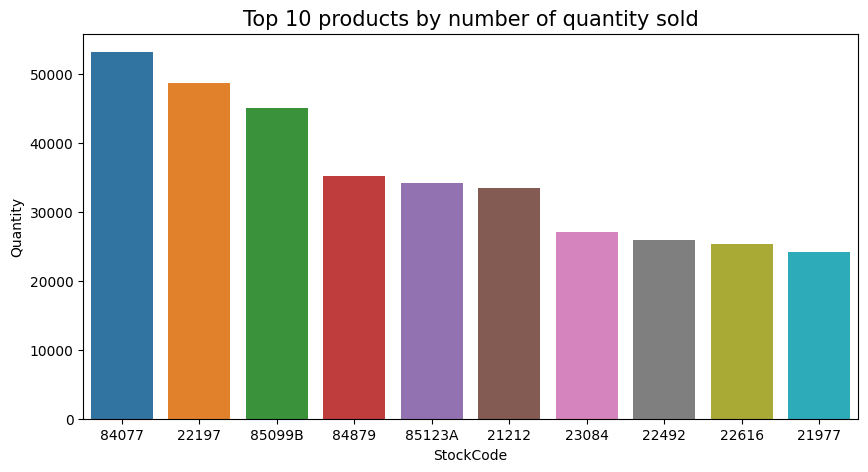

In [34]:
# Total Quantity sold by each product
total_quantity_sold = df.groupby(['StockCode'])['Quantity'].sum().reset_index().sort_values('Quantity', ascending=False).reset_index(drop=True)

# ploting bar chart for top 10 products
plt.figure(figsize=(10,5))
plt.title('Top 10 products by number of quantity sold', fontdict={'size': 15})
sns.barplot(x='StockCode',y='Quantity',data=total_quantity_sold.head(10),)

In [35]:
# products with low quantity 
total_quantity_sold.tail(10)

,StockCode,Quantity
3674,21412,-6
3675,20703,-6
3676,35400,-6
3677,79323W,-8
3678,22034,-9
3679,21144,-12
3680,CRUK,-16
3681,21645,-24
3682,D,-1194
3683,84347,-1475


In [36]:
#  Number of products with less than 10 quantity sold
least_count = (total_quantity_sold[(total_quantity_sold['Quantity'] < 10)].shape)[0]
print(f'Number of products with less than 10 quantity sold is {least_count}')

Number of products with less than 10 quantity sold is 378


Number of products with less than 10 quantity sold is 378. also there are some products having negative sold quantity count, need more data to analyze these, but in case of lack of information i am assuming that these are dead stock or previously placed order which got cancelled out later.

##### 1. Why did you pick the specific chart?

Bar charts are a popular way of visualizing data and have several benefits:

* Clear visual representation: Bar charts are easy to read and understand. They provide a clear visual representation of data that can be easily interpreted.

* Comparison of data: Bar charts are particularly useful when comparing data. The length or height of each bar can be compared to others to quickly see which is larger or smaller.

* Simple to create: Bar charts are simple to create and can be made with a variety of software and tools, including Excel and Google Sheets.

* Flexibility: Bar charts can be used to display a wide variety of data types, including categorical, ordinal, and numerical data.

* Easy to customize: Bar charts are easy to customize, allowing you to change colors, labels, and other elements to create a chart that fits your needs.

* Attention-grabbing: Bar charts are attention-grabbing and can quickly draw the viewer's eye to important data.

Overall, bar charts are a powerful tool for visualizing data, making it easier to compare and understand large sets of information.

##### 2. What is/are the insight(s) found from the chart?

* There are total 3684 different products.
* Producs with stockcode '84077' is most sold product with total number of quantity sold over 50000.
* Producs with stockcode '2219' and '85099B' are 2nd and 3rd most sold product with total number of quantity sold over 40000.
* The minimum quantity sold is over 24000 by 10th most sold product.
* Also Number of products with less than 10 quantity sold is more than 300.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes, These top 10 products are doing great, business can keep extra stocks of these products, also business could try increasing their price to make more profit.
* There are more than 300 products with less than 10 total quantity sold, we need to check these products are worth keeping or it can lead to negative business growth.

### Top most and least frequent products.

<Axes: title={'center': 'top 20 most frequent products'}, xlabel='count', ylabel='StockCode'>

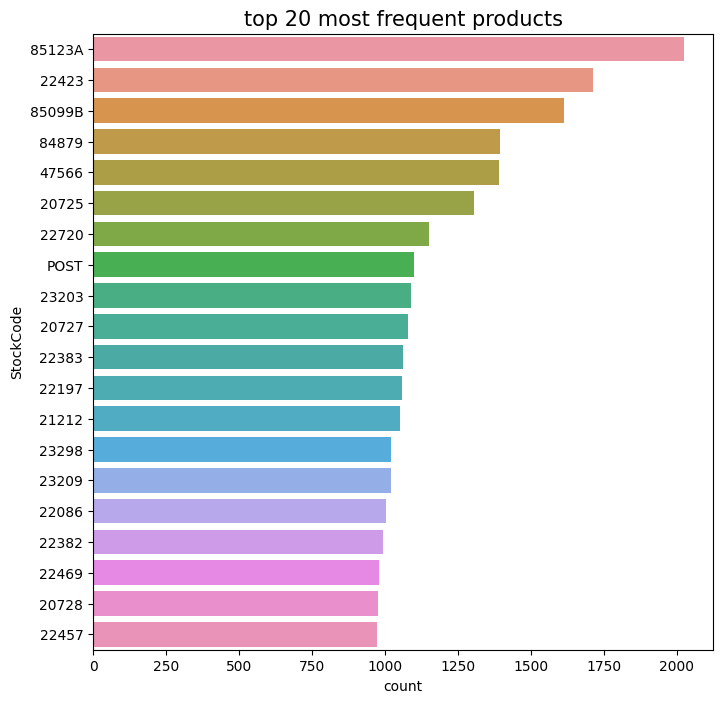

In [37]:
# transaction count for each product
count_df = df[df['Quantity'] > 0].groupby(['StockCode']).StockCode.count().reset_index(name='count').sort_values(['count'], ascending=False).reset_index(drop = True)

# ploting horizontal bar chart for top 20 most frequent products
plt.figure(figsize=(8,8))
plt.title('top 20 most frequent products', fontdict={'size': 15})
sns.barplot(y='StockCode',x='count',data=count_df.head(20),orient = 'h')

In [38]:
# least frequent products with total transaction count less than 5
least_count = (count_df[(count_df['count'] < 5)].shape)[0]
print(f'Products with total transaction count less than 5 is {least_count}')

Products with total transaction count less than 5 is 476


##### 1. Why did you pick the specific chart?

Horizontal bar graphs are a type of chart that displays data using horizontal bars to represent values. They are useful for visualizing comparisons between categories, where the length of the bar represents the value of the category.

Some benifits of using Horizontal Bar graphs are:

* Efficient use of space
* Easier to compare values
* Better for showing rank order
* More visually appealing

##### 2. What is/are the insight(s) found from the chart?

* some of most frequents products are 85123A, 22423, 85099B, 84879, 20725 and 47566 with more than 1300 transaction count.
* count of least frequent products with total transaction count less than 5 is more than 400.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes , bussiness should keep above products in stocks every time as these are most frequents products, it will help improve availability and create possitive bussiness impact.

* There are more than 400 least frequent products with total transaction count less than 10, keeping their stock lead to waste of space, it can cause negative impact on business. 

### Most expensive products and their quantity sold.

Not considering ['BANK CHARGES', 'C2', 'CRUK', 'D', 'DOT', 'M', 'PADS', 'POST'] as these stockcodes not look similar to regular stockcodes.

In [39]:
# extracting the 'StockCode' and their 'UnitPrice'
non_regular_stockcodes = ['BANK CHARGES', 'C2', 'CRUK', 'D', 'DOT', 'M', 'PADS', 'POST']
unit_price_df = df[(~df['StockCode'].isin(non_regular_stockcodes))].groupby(['StockCode'])['UnitPrice'].agg(lambda x: pd.Series.mode(x)[0]).to_frame().sort_values('UnitPrice', ascending = False).reset_index()
unit_price_df = pd.merge(unit_price_df, total_quantity_sold, on = 'StockCode')

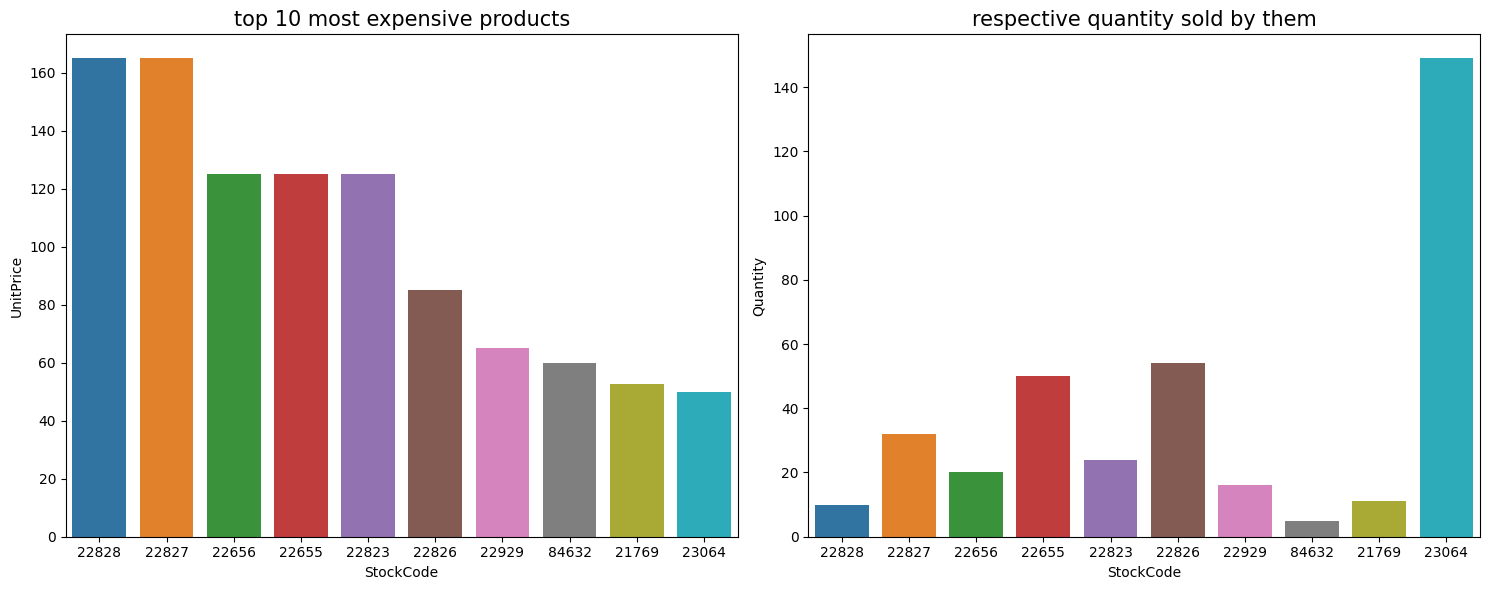

In [40]:
# defining figure size
fig = plt.figure(figsize=(15,6))
# ploting bar chart for top 10 most expensive products
plt.subplot(1, 2, 1)
plt.title('top 10 most expensive products', fontdict={'size': 15})
sns.barplot(x='StockCode',y='UnitPrice',data=unit_price_df.head(10), order=unit_price_df['StockCode'].head(10))

# ploting qunatity sold by each of 10 most expensive products'
plt.subplot(1, 2, 2)
plt.title('respective quantity sold by them', fontdict={'size': 15})
sns.barplot(x='StockCode',y='Quantity',data=unit_price_df.head(10), order=unit_price_df['StockCode'].head(10))
plt.tight_layout()

### Least expensive products and their quantity sold.

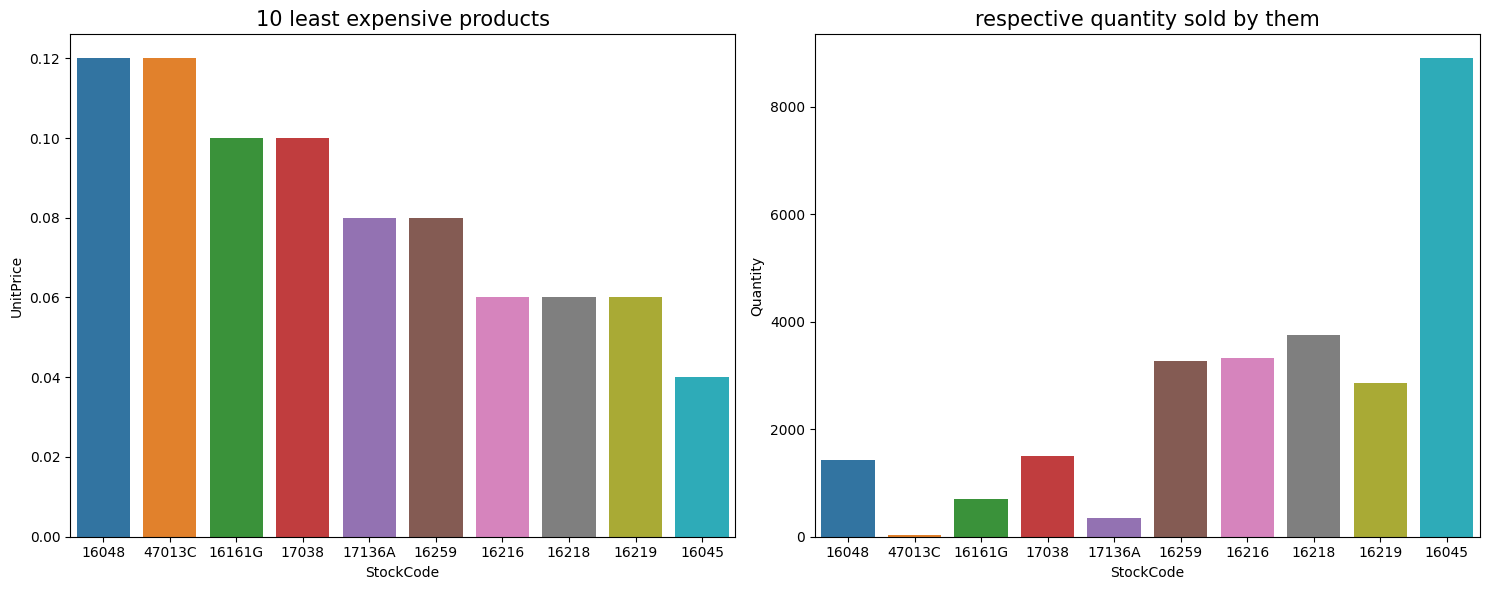

In [41]:
# defining figure size
fig = plt.figure(figsize=(15,6))
# ploting bar chart for 10 least expensive products
plt.subplot(1, 2, 1)
plt.title('10 least expensive products', fontdict={'size': 15})
sns.barplot(x='StockCode',y='UnitPrice',data=unit_price_df.tail(10))

# ploting qunatity sold by each of 10 least expensive products'
plt.subplot(1, 2, 2)
plt.title('respective quantity sold by them', fontdict={'size': 15})
sns.barplot(x='StockCode',y='Quantity',data=unit_price_df.tail(10))
plt.tight_layout()

##### 2. What is/are the insight(s) found from the chart?

insights from 10 most expensive products : 
* most expensive products are 22828 and 22827  with unit price of 165 dollar.
* 23064 is 10th most expensive product with unit price of 49.95 dollar but it has highest quantity sold of 149 units among all 10 most expensive.
* lowest quantity sold by 84632 which is 8th most expensive product with unit price of 59.95 and qunatity sold is only 5 units.

insights from 10 least expensive products:
* 16045 and 16219 are least expensive products with unit price of 0.04 and 0.06 dollars respectively.
* 16045 is cheapest product among all but it has highest quantity sold of 8900 among all 10 least expensive products.
* 47013C has lowest qunatity sold of 31 units only with unit price of 0.12 dollar only.


### Top 10 products with highest sale value

<Axes: title={'center': '8.28% of total sale is made by top 10 products '}, xlabel='StockCode', ylabel='TotalPrice'>

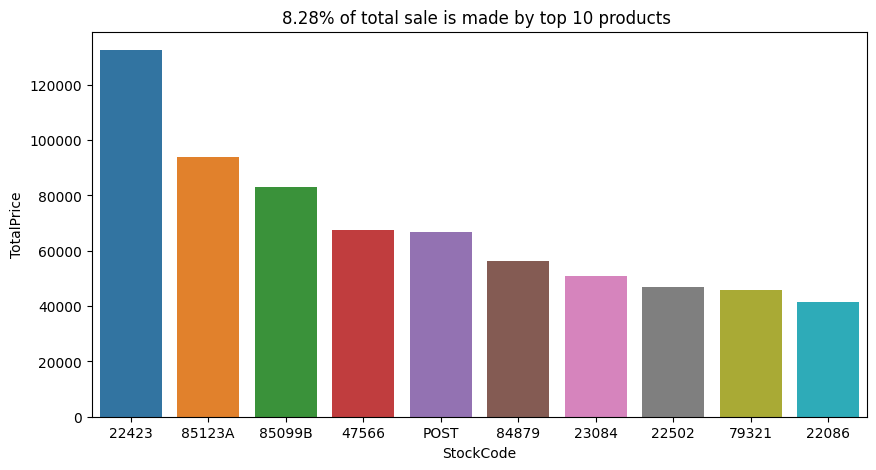

In [42]:
# Total sale by each product
sale_df = df.groupby(['StockCode'])['TotalPrice'].sum().reset_index().sort_values('TotalPrice', ascending=False).reset_index(drop=True)

# percenatge of top 10 product with highest sale
percentage_of_top_10 = round(sale_df['TotalPrice'].head(10).sum() / sale_df['TotalPrice'].sum() * 100, 2)

# ploting bar chart for top 10 products with highest sale
plt.figure(figsize=(10,5))
plt.title(f'{percentage_of_top_10}% of total sale is made by top 10 products ', fontdict={'size': 12})
sns.barplot(x='StockCode',y='TotalPrice',data=sale_df.head(10),)

### products with sale value less than 100 dollar.

In [43]:
# products with sale value less than 100 dollar
lowest_count = (sale_df[(sale_df['TotalPrice'] < 100)].shape)[0]
print(f'products having sale value less than 100 dollar is {lowest_count}')

products having sale value less than 100 dollar is 848


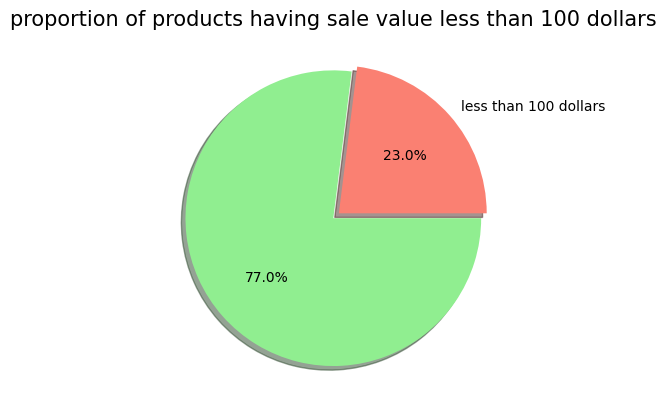

In [44]:
# ploting pie chart to show percentage of products having sale value less than 100 dollars.
plt.title('proportion of products having sale value less than 100 dollars', fontsize = 15)
plt.pie([848, (df['StockCode'].nunique() - 848)], autopct = '%1.1f%%', labels = ['less than 100 dollars', ''], explode = [0.05,0], shadow = True, colors = ['salmon','lightgreen'])
plt.show()

There are 23% products having sale value less than 100 dollars.

##### 2. What is/are the insight(s) found from the chart?

* 8.28% of total sale is made by top 10 products.
* top 10 products with  highest sale value are '22423', '85123A', '85099B', '47566', 'POST', '84879', '23084', '22502','79321', and '22086'.
* Stockcode 22423 has highest sale value of more than 130k dollars.
* Stockcode 85123A has 2nd highest sale amount of more than 90k dollars.
* 23% of product have sale value less than 100 dollars.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* There are around 200 products having sale value less than 10 dollars including negative sales. we need to further analyze these products worth or keeping these blindly will lead to negative bussiness growth.

### Generate word cloud for 'Description'.

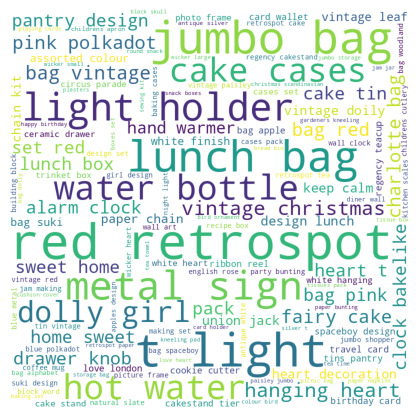

In [45]:
# Python program to generate WordCloud
 
# importing wordcloud modules
from wordcloud import WordCloud, STOPWORDS
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.Description:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (6, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

##### 1. Why did you pick the specific chart?

A word cloud is a graphical representation of textual data in which the size of each word indicates its frequency or importance. Word clouds are useful for visualizing text data, as they allow you to quickly identify the most common or important words in a document or dataset.

why you might want to generate a word cloud :

* Summarizing text: A word cloud can be a quick and effective way to summarize the main themes or topics in a document, article, or blog post.
* Data exploration: Word clouds can help you explore a dataset and identify patterns or trends in the data.
* Presentation: Word clouds can be a visually appealing way to present information or findings.
* Marketing and branding: Word clouds can be used in marketing and branding efforts to help identify the key themes or messages associated with a brand or product.

##### 2. What is/are the insight(s) found from the chart?

* some of the frequently ordered products are related to light holder, water bottle, hanging heart, lunch bag, doll, red retrospot, metal sign and jumbo bag. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* It will be good to keep extra stocks of products related to frequents words shown in above word cloud, it will create possitie business impact. 

## Customer Analysis

### Unique customer count

In [46]:
# Unique customer count
customer_count = df['CustomerID'].nunique()
print(f'Total customer count is {customer_count}')

Total customer count is 4372


### Top 10 customers with highest transaction count and their total purchase value.

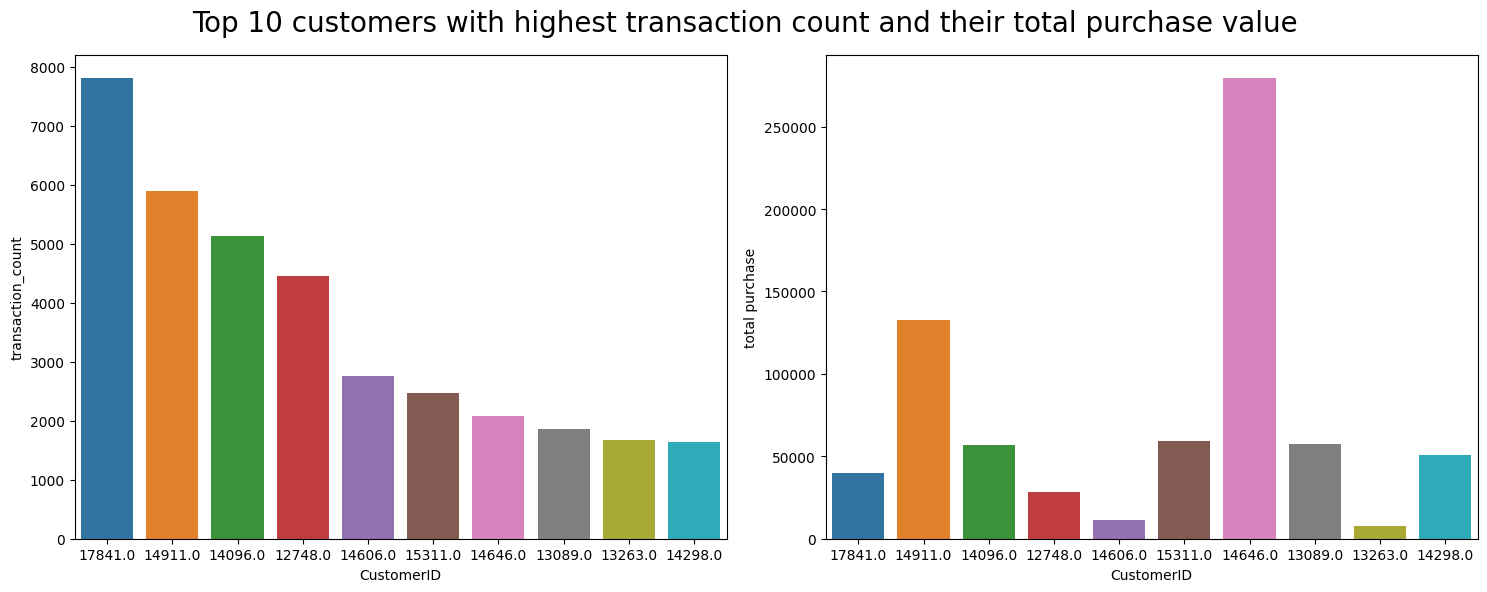

In [47]:
# transaction count for each customer
t_count = df.groupby(['CustomerID']).agg({'InvoiceNo' : 'count', 'TotalPrice' : 'sum'}).rename(columns = {'InvoiceNo' : 'transaction_count'}).sort_values(['transaction_count'], ascending=False).reset_index()

# defining figure size
fig = plt.figure(figsize=(15,6))
fig.suptitle('Top 10 customers with highest transaction count and their total purchase value', fontsize= 20)

# ploting bar chart for Top 10 customers with highest transaction count
plt.subplot(1, 2, 1)
sns.barplot(x='CustomerID',y='transaction_count',data=t_count.head(10), order=t_count['CustomerID'].head(10))

# ploting total purchase value'
plt.subplot(1, 2, 2)
sns.barplot(x='CustomerID',y='TotalPrice',data=t_count.head(10), order=t_count['CustomerID'].head(10))
plt.ylabel('total purchase')
plt.tight_layout()

### Customers having low transaction count.

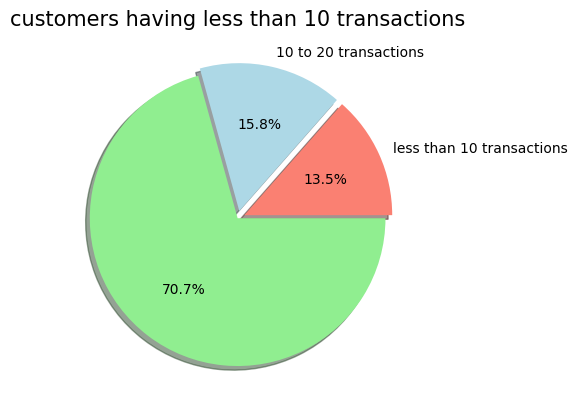

In [48]:
# customer count having less than 10 transactions
lessthan10 = t_count[t_count['transaction_count'] < 10].shape[0]
# customer count having 10 to 20 transactions
between10_20 = t_count[t_count['transaction_count'].isin(range(10,21)) ].shape[0]
# customer count having more than 20 transactions
morethan20 = customer_count - lessthan10 - between10_20

# ploting pie chart to show percentage of customer having less than 10 transaction count
plt.title('customers having less than 10 transactions', fontsize = 15)
plt.pie([lessthan10, between10_20, morethan20], autopct = '%1.1f%%', labels = ['less than 10 transactions', '10 to 20 transactions', ''], explode = [0.05,0.05, 0], shadow = True, colors = ['salmon','lightblue', 'lightgreen'])
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are commonly used in data visualization to display proportions or percentages of a whole. They can be useful for presenting data in a clear and concise way, particularly when you want to show the relative sizes of different categories.

Some of the benefits of using pie charts include:

* Easy to understand
* Good for displaying proportions
* Useful for comparisons
* Attractive
* Can highlight trends

##### 2. What is/are the insight(s) found from the chart?

* Total customer count is 4372.
* '17841' customer has highest number of transactions.
* '14911' and '14096' have more than 5000 transactions.
* '14646' has 2085 transactions but has highest total purchase value of more than 250k among top 10 customers by highest transaction count.
* There are 13.5% customers having less than 10 transactions.
* 15.8% having 10 to 20 transactions. 

### top most and least frequent customers according to total Invoice count.

In [49]:
# Unique 'InvoiceNo' count
invoice_count = df['InvoiceNo'].nunique()
print(f'Total Invoice count is {invoice_count}')

Total Invoice count is 22190


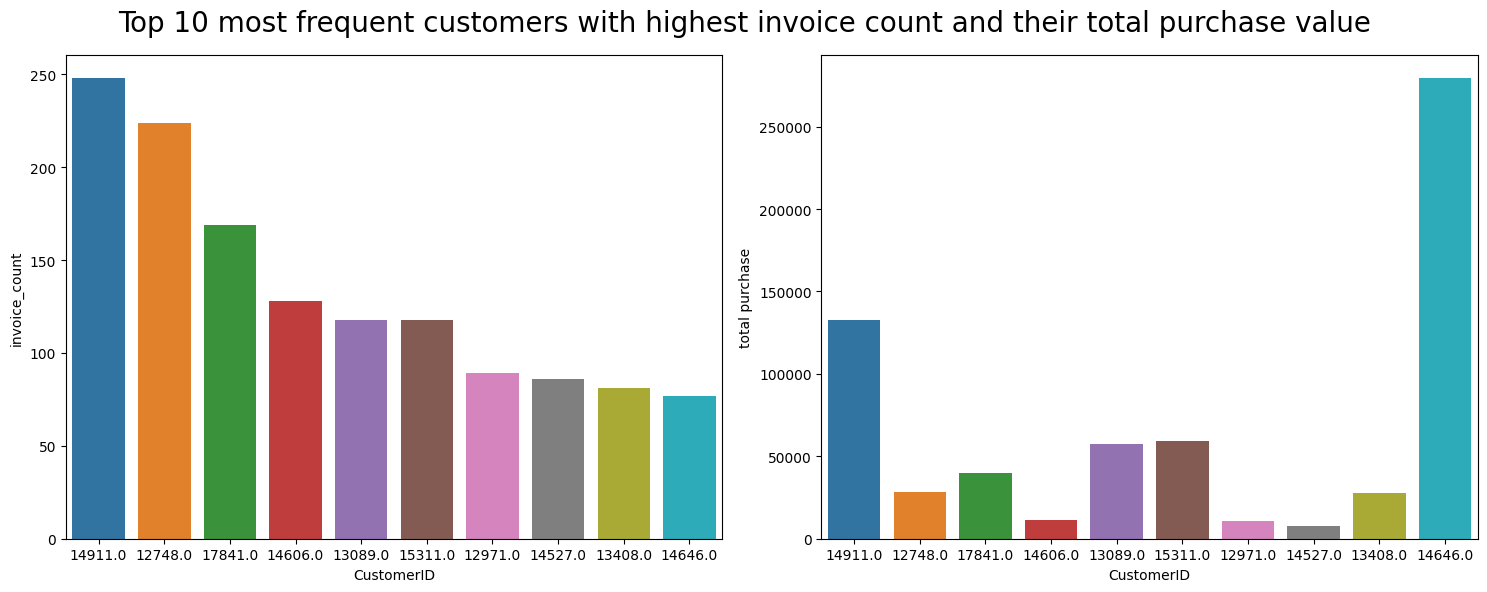

In [50]:
# invoice count of each customers with total purchase value
customer_invoice_df = df.groupby(['CustomerID']).agg({'InvoiceNo' : 'nunique', 'TotalPrice' : 'sum'}).rename(columns = {'InvoiceNo' : 'invoice_count'}).sort_values(['invoice_count'], ascending=False).reset_index()

# defining figure size
fig = plt.figure(figsize=(15,6))
fig.suptitle('Top 10 most frequent customers with highest invoice count and their total purchase value', fontsize= 20)

# ploting bar chart for Top 10 most frequent customers with highest invoice count
plt.subplot(1, 2, 1)
sns.barplot(x='CustomerID',y='invoice_count',data=customer_invoice_df.head(10), order=customer_invoice_df['CustomerID'].head(10))

# ploting total purchase value'
plt.subplot(1, 2, 2)
sns.barplot(x='CustomerID',y='TotalPrice',data=customer_invoice_df.head(10), order=customer_invoice_df['CustomerID'].head(10))
plt.ylabel('total purchase')
plt.tight_layout()

### less frequent customers

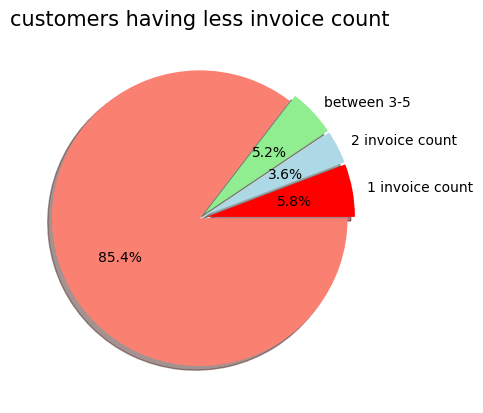

In [51]:
# customer count having only 1 invoice count 
f_1 = customer_invoice_df[(customer_invoice_df['invoice_count'] == 1) & (customer_invoice_df['TotalPrice'] > 0)].shape[0]
# customer count having only 2 invoice count 
f_2 = customer_invoice_df[(customer_invoice_df['invoice_count'] == 2) & (customer_invoice_df['TotalPrice'] > 0)].shape[0]
# customer count having 3 to 5 invoice count  
f_3_5 = customer_invoice_df[(customer_invoice_df['invoice_count'].isin(range(3,6))) & (customer_invoice_df['TotalPrice'] > 0)].shape[0]
# customer count having more than 5 invoice count 
morethan5 = invoice_count - f_1 - f_2 - f_3_5

# ploting pie chart to show percentage of customer having less invoice count
plt.title('customers having less invoice count', fontsize = 15)
plt.pie([f_1, f_2, f_3_5, morethan5], autopct = '%1.1f%%', labels = ['1 invoice count', '2 invoice count', 'between 3-5', ''], explode = [0.05,0.05, 0.05, 0], shadow = True, colors = ['red','lightblue', 'lightgreen', 'salmon'])
plt.show()

##### 2. What is/are the insight(s) found from the chart?

In [52]:
customer_invoice_df['CustomerID'].head(10).values

array([14911., 12748., 17841., 14606., 13089., 15311., 12971., 14527.,
       13408., 14646.])

* Total Invoice count is 22190.
* top 10 most frequent customers by invoice count are 14911, 12748, 17841, 14606, 13089, 15311, 12971, 14527,13408 and 14646.
* '14646' has highest total purchase value among them.
* there 5.8% customers who has puchased only 1 time.
* 3.6% have only 2 invoice count.
* 5.2% have 3 to 5 invoice count.


### top 10 customers with highest total purchase value.

<Axes: title={'center': '16.53% of total sale is made by top 10 customers '}, xlabel='CustomerID', ylabel='TotalPrice'>

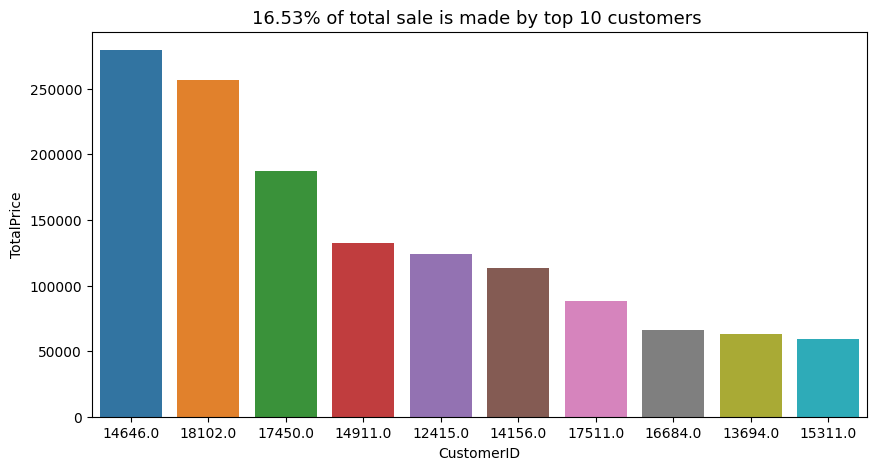

In [53]:
# Total purchase by each customer
customer_sale_df = df.groupby(['CustomerID'])['TotalPrice'].sum().reset_index().sort_values('TotalPrice', ascending=False).reset_index(drop=True)

# percenatge of top 10 customers with highest total purchase.
percentage_of_top_10 = round(customer_sale_df['TotalPrice'].head(10).sum() / customer_sale_df['TotalPrice'].sum() * 100, 2)

# ploting bar chart for top 10 customers with highest total purchase.
plt.figure(figsize=(10,5))
plt.title(f'{percentage_of_top_10}% of total sale is made by top 10 customers ', fontdict={'size': 13})
sns.barplot(x='CustomerID',y='TotalPrice',data=customer_sale_df.head(10), order = customer_sale_df['CustomerID'].head(10))

### customer with total purchase less than 100 dollar.

In [54]:
# customer with total purchase less than 100 dollar
less_count = (customer_sale_df[(customer_sale_df['TotalPrice'] < 100)].shape)[0]
print(f'customer count with total purchase less than 100 dollar is {less_count}')

customer count with total purchase less than 100 dollar is 218


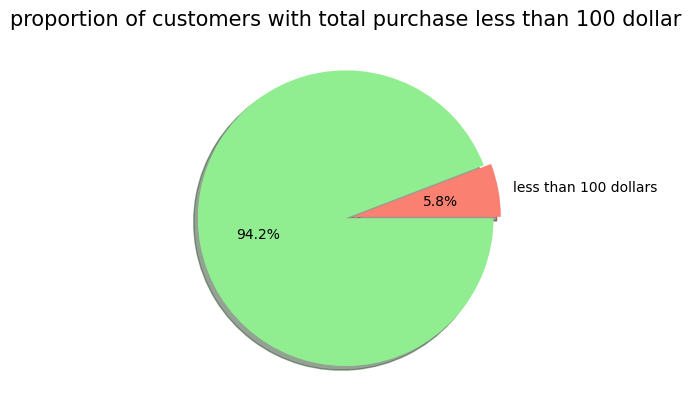

In [55]:
# ploting pie chart to show percentage of products having sale value less than 100 dollars.
plt.title('proportion of customers with total purchase less than 100 dollar', fontsize = 15)
plt.pie([218, (df['CustomerID'].nunique() - 848)], autopct = '%1.1f%%', labels = ['less than 100 dollars', ''], explode = [0.05,0], shadow = True, colors = ['salmon','lightgreen'])
plt.show()

There are 5.8 percent customers whose purchase value is less than 100 dollars.

##### 2. What is/are the insight(s) found from the chart?

* Top 10 customers with highest purchase value are '14646', '18102', '17450', '14911', '12415', '14156', '17511', '16684', '13694',and  '15311'.
* '14646' and '18102' these two customer have highest purchase value of more than 250k.
* 5.8% of customers have purchase value of less than 100 dollars.

### ploting Histogram for total purchase per customer.

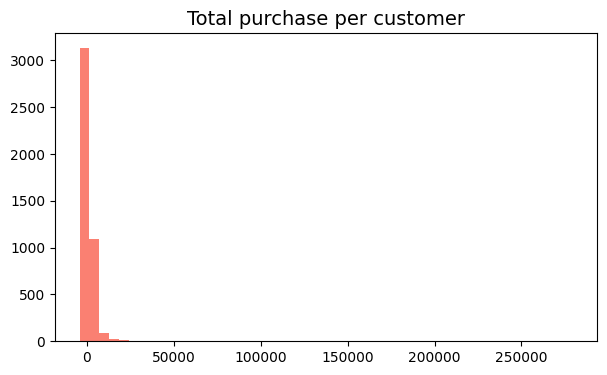

In [56]:
# defining figure size
fig = plt.figure(figsize=(7,4))

# ploting Histogram for TotalPrice
plt.hist(customer_sale_df['TotalPrice'], bins = 50, color='salmon')
plt.title('Total purchase per customer', fontsize = 14)
plt.show()

In [57]:
customer_sale_df['TotalPrice'].describe()

count      4372.000000
mean       1893.531433
std        8218.696204
min       -4287.630000
25%         291.795000
50%         644.070000
75%        1608.335000
max      279489.020000
Name: TotalPrice, dtype: float64

In [58]:
# quantile values
customer_sale_df['TotalPrice'].quantile([0.9, 0.99])

0.90     3496.2010
0.99    17226.2949
Name: TotalPrice, dtype: float64

##### 1. Why did you pick the specific chart?

Histogram is a powerful tool for visualizing and analyzing data. It can help you identify central tendency, understand the spread of data, make inferences, and compare distributions.

##### 2. What is/are the insight(s) found from the chart?

* Positively skewed distribution.
* 90% of customers have total purchase value of less than 3.5k dollars.
* 99% have less than 17k dollars.
* only 1% customers have total purchase value of more than 17k dollars.

## Geographical analysis

### Unique country count

In [59]:
# Unique customer count
customer_count = df['Country'].nunique()
print(f'Total country count is {customer_count}')

Total country count is 37


### order percentage per country.

In [60]:
# order count by country
country_count = df[~df['InvoiceNo'].str.contains('C')].groupby(['Country'])['Country'].count().reset_index(name='order_count').sort_values(['order_count'], ascending=False)
# calculating order percentage of each country
country_count['order_percent'] = country_count['order_count'] / country_count['order_count'].sum() * 100

# cancel order count by country
country_cancel_count = df[df['InvoiceNo'].str.contains('C')].groupby(['Country'])['Country'].count().reset_index(name='cancel_count')
country_count = country_count.merge(country_cancel_count, on = 'Country')

# calculate cancelled order percent
country_count['cancel_percent'] = country_count['cancel_count'] / country_count['order_count'] * 100



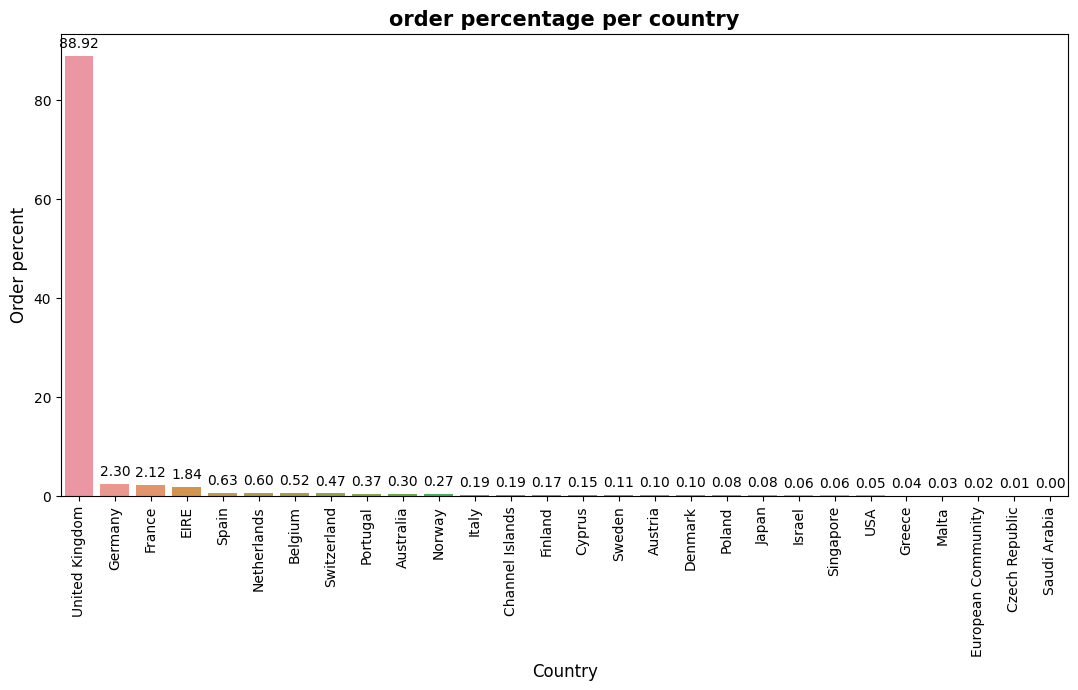

In [61]:
# Figure Size
plt.figure(figsize = (13,6))

# ploting bar chart to visualize order percentage per country.
splot = sns.barplot(x='Country', y='order_percent', data = country_count)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('order percentage per country',weight='bold', size=15)
plt.ylabel('Order percent', size=12, )
plt.xlabel('Country', size=12,)
plt.xticks(rotation=90)
plt.show()

### Percent order cancelled by each country

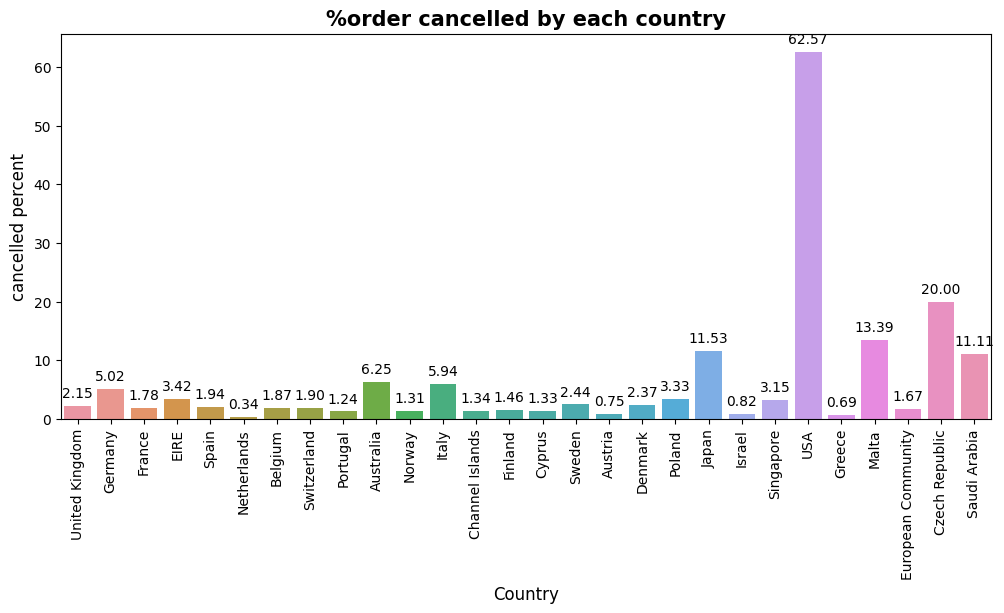

In [62]:
# Figure Size
plt.figure(figsize = (12,5))

# ploting bar chart to visualize percenatge of cancelled order by each country
splot = sns.barplot(x='Country', y='cancel_percent', data = country_count)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('%order cancelled by each country',weight='bold', size=15)
plt.ylabel('cancelled percent', size=12, )
plt.xlabel('Country', size=12,)
plt.xticks(rotation=90)
plt.show()

##### 2. What is/are the insight(s) found from the chart?

* Total country count is 37.
* 89% of orders are coming from United Kingdom alone.
* Czech Republic and soudi Arabia has lowest order count.
* USA and Czech Republic has highest cancelled order percentage of 62% and 20% which means 62% of order has been cancelled from total number of orders.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

USA has 62% cancelltion rate which could be very costly in case order getting cancelled after dispatch, so we need analysis country's order having high cancellation rate. else it will lead to negative business growth.

### customer count per country

In [63]:
# customer count per country
customer_countdf = df.groupby(['Country']).agg(customer_count = ('CustomerID' , 'nunique'), total_sale = ('TotalPrice' , 'sum')).reset_index().sort_values(['customer_count'], ascending=False)

# calculating sale percentage of each country
customer_countdf['sale_percent'] = customer_countdf['total_sale'] / customer_countdf['total_sale'].sum() * 100


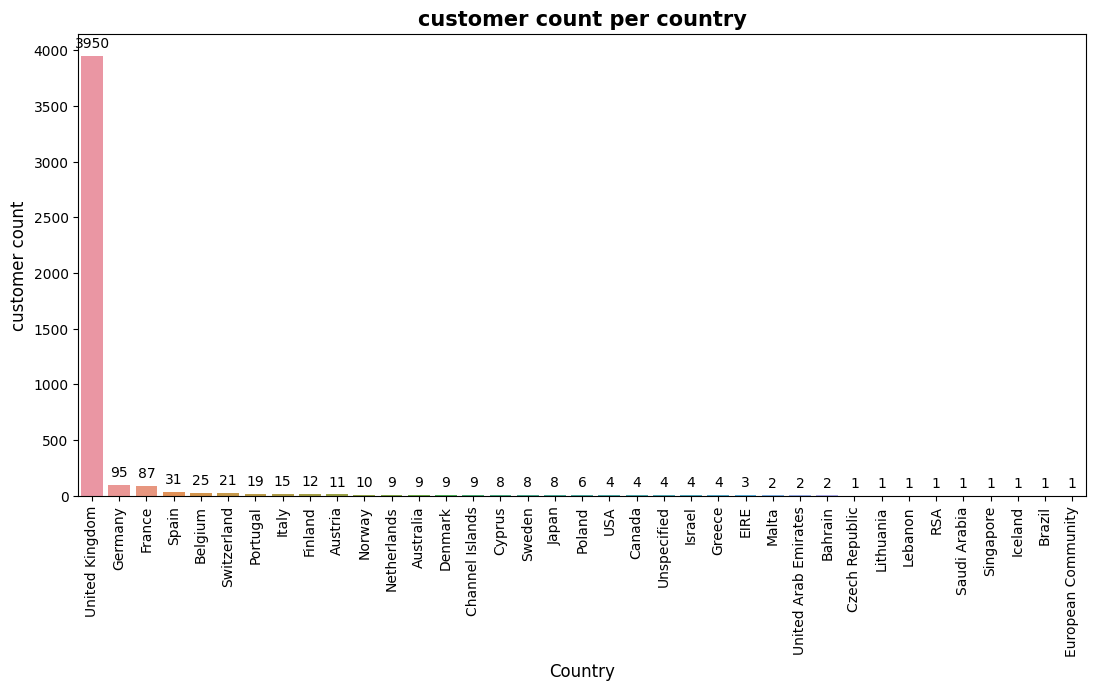

In [64]:
# Figure Size
plt.figure(figsize = (13,6))

# ploting bar chart to visualize customer count per country.
splot = sns.barplot(x='Country', y='customer_count', data = customer_countdf)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('customer count per country',weight='bold', size=15)
plt.ylabel('customer count', size=12, )
plt.xlabel('Country', size=12,)
plt.xticks(rotation=90)
plt.show()

### sale percentage by each country

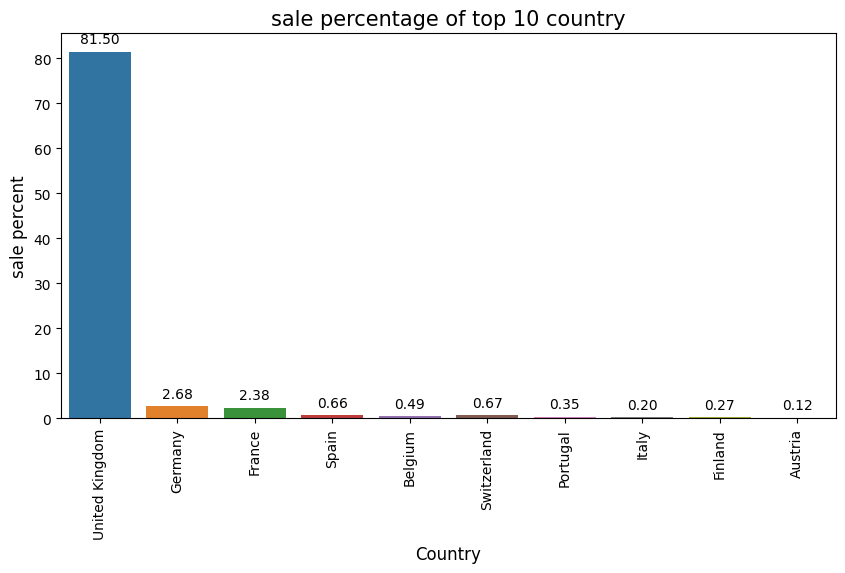

In [65]:
# Figure Size
plt.figure(figsize = (10,5))

# ploting bar chart to visualize total sale percentage by top 10 country
splot = sns.barplot(x='Country', y='sale_percent', data = customer_countdf.head(10))
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('sale percentage of top 10 country', size=15)
plt.ylabel('sale percent', size=12, )
plt.xlabel('Country', size=12,)
plt.xticks(rotation=90)
plt.show()

##### 2. What is/are the insight(s) found from the chart?

* United Kingdom has highest customer count with 81.50% sale.
* most of the countries have less than 10 customers.
* Germany and France has decent customer count.

## DateTime analysis

Creating DateTime dataframe with daily sale and daily order count.

In [103]:
# geting transacation count and total sale per day
DateTime_df = df.groupby(['date']).agg(transaction_count = ('date', 'count'), sale = ('TotalPrice', 'sum')).reset_index() 

# coverting dtype to datetime.
DateTime_df['date'] = pd.to_datetime(DateTime_df['date'])

# extracting 'year' from 'Date'
DateTime_df['year'] = DateTime_df['date'].dt.year

# extracting 'month' from 'Date'
DateTime_df['month'] = DateTime_df['date'].dt.strftime('%b')

# extracting 'day' from 'Date'
DateTime_df['day'] = DateTime_df['date'].dt.day

# extracting 'weekday' from 'Date'
DateTime_df['weekday'] = DateTime_df['date'].dt.day_name()


### Transaction Count And Sale Trend over period of 1 year on daily basis.

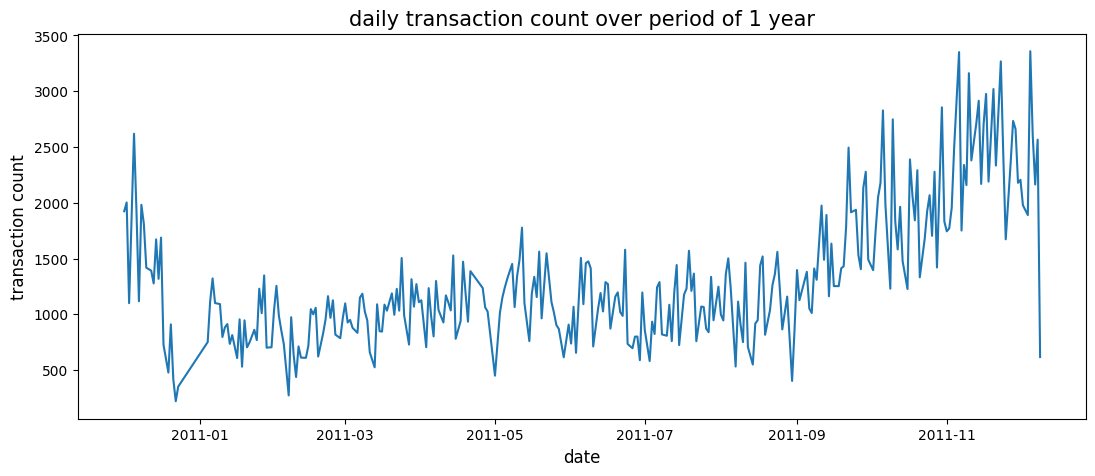

In [88]:
# Figure Size
plt.figure(figsize = (13,5))
# ploting transaction count over period of 1 year on daily basis.
plt.plot(DateTime_df['date'], DateTime_df['transaction_count'])
plt.title('daily transaction count over period of 1 year', size=15)
plt.ylabel('transaction count', size=12, )
plt.xlabel('date', size=12,)
plt.show()

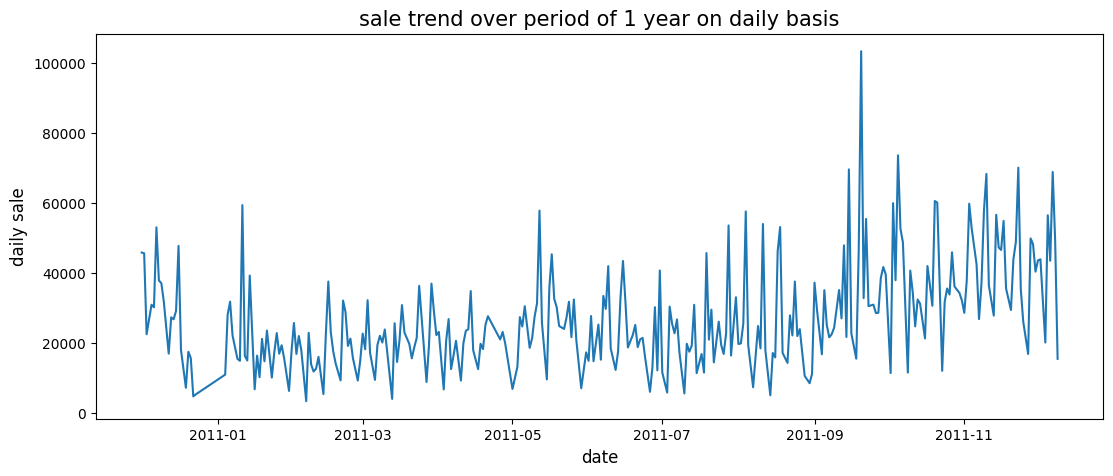

In [104]:
# Figure Size
plt.figure(figsize = (13,5))
# ploting sale trend over period of 1 year on daily basis.
plt.plot(DateTime_df['date'], DateTime_df['sale'])
plt.title('sale trend over period of 1 year on daily basis', size=15)
plt.ylabel('daily sale', size=12, )
plt.xlabel('date', size=12,)
plt.show()

##### 1. Why did you pick the specific chart?

Line charts are a type of data visualization tool that are commonly used to display trends over time. benefits of using a line chart:

* Easy to understand: Line charts are simple to read and understand, even for people who are not familiar with data visualization. The chart plots data points on a line, making it easy to see trends and patterns.

* Visualize trends over time: Line charts are particularly useful for showing changes in data over time. By plotting data points on a time series, it's easy to see trends, patterns, and outliers.

* Identify relationships: Line charts can help identify relationships between variables. By plotting two variables on the same chart, it's possible to see how they are related and whether there is a correlation between them.

* Highlight key points: Line charts can be used to highlight key points in a data set. By marking data points with labels, it's possible to draw attention to important events, changes, or trends.

* Compare multiple data sets: Line charts can be used to compare multiple data sets. By plotting multiple lines on the same chart, it's possible to see how different variables compare and whether there are any common trends.

### Monthly sale and transaction count

In [108]:
# monthly sale and transactions count
monthly_df = DateTime_df.groupby('month').agg(transaction_count = ('transaction_count', 'sum'), sale = ('sale', 'sum')).reset_index() 

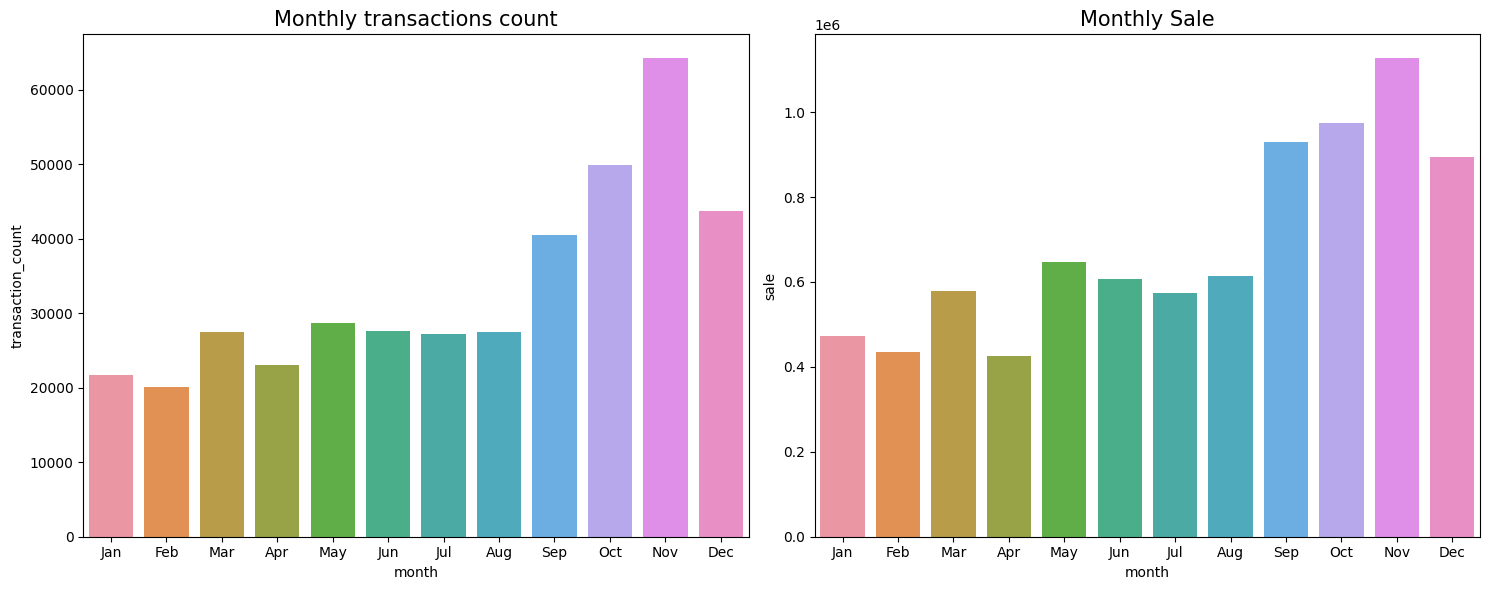

In [112]:
# defining figure size
fig = plt.figure(figsize=(15,6))

# ploting bar chart for visualizing monthly transactions count
plt.subplot(1, 2, 1)
order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.barplot(x='month',y='transaction_count',data=monthly_df, order=order)
plt.title('Monthly transactions count', fontsize = 15)

# ploting bar chart for visualizing monthly sale
plt.subplot(1, 2, 2)
sns.barplot(x='month',y='sale',data=monthly_df, order=order)
plt.title('Monthly Sale', fontsize = 15)
plt.tight_layout()

### Monthly average sale trend.

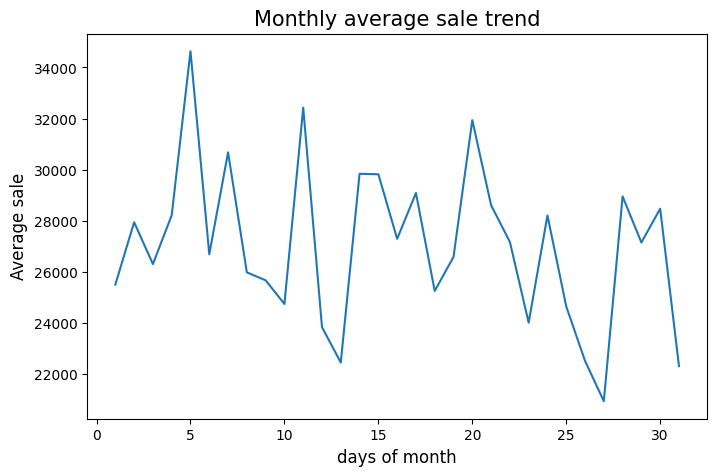

In [124]:
# 30 days average sale
thirtydays_df = DateTime_df.groupby('day').agg(sale = ('sale', 'mean')).reset_index() 

# Figure Size
plt.figure(figsize = (8,5))
# ploting Monthly average sale trend.
plt.plot(thirtydays_df['day'], thirtydays_df['sale'])
plt.title('Monthly average sale trend', size=15)
plt.ylabel('Average sale', size=12, )
plt.xlabel('days of month', size=12,)
plt.show()

### Weekly average sale trends.

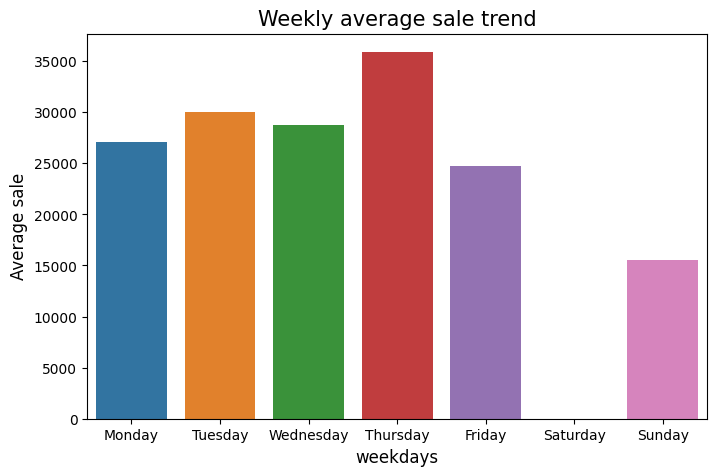

In [131]:
# weekdays average sale
weekly_df = DateTime_df.groupby('weekday').agg(sale = ('sale', 'mean')).reset_index()

# Figure Size
plt.figure(figsize = (8,5))
# ploting Weekly average sale trend.
order =  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x='weekday',y='sale',data=weekly_df, order=order)
plt.title('Weekly average sale trend', size=15)
plt.ylabel('Average sale', size=12, )
plt.xlabel('weekdays', size=12,)
plt.show()

### Average Invoice count at each hour.

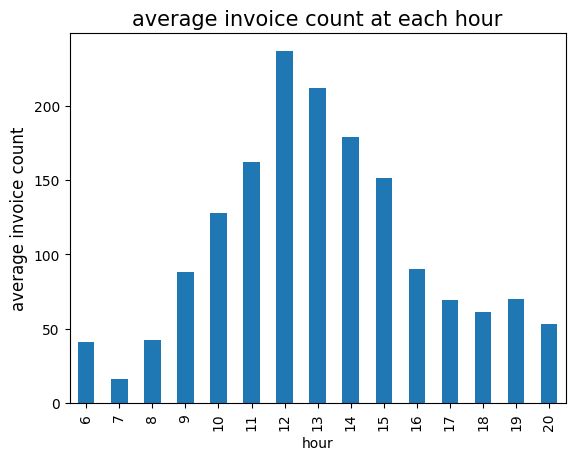

In [163]:
# ploting average Invoice count at each hour.
df.groupby(['date', 'hour']).agg(invoice_count = ('InvoiceNo', 'count')).reset_index().groupby('hour')['invoice_count'].mean().plot.bar()
plt.title('average invoice count at each hour', fontsize = 15)
plt.ylabel('average invoice count', fontsize = 12)
plt.show()

##### 2. What is/are the insight(s) found from the chart?

**Insights from DateTime analysis :** 
* number of daily transactions is high in last quarter may be because of halloween and christmas eve like festivals.
* Daily sale is also high in 2nd half in comparision to 1st half.  
* highest sale in month of November.
* sale is high in last 4 months compared to other months.
* closed on saturday, don't get any orders on saturday.
* average sale on sunday is low compared to other weekdays.
* most of the invoices are generated between 9am to 5pm.
* average Invoice count is high in afternoon and low in early morning and late evening. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***